In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# метод рунге-кутта
def rk4(f, y0, x1, x2, h):
    num = int((x2 - x1) / h)
    
    x_arr = np.zeros(num + 1)
    y_arr = np.zeros((num + 1, 2))
    
    x_arr[0] = x1
    y_arr[0] = y0
    x = x1
    y = y0
    for i in range(1, num + 1):
        k1 = f(x, y)
        k2 = f(x + h / 2, y + h / 2 * k1)
        k3 = f(x + h / 2, y + h / 2 * k2)
        k4 = f(x + h, y + h * k3)
        y = y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        x += h
        x_arr[i] = x
        y_arr[i] = y
        
    return (x_arr, y_arr)

In [3]:
# производная первого порядка
def derivative(f, x, h):
    return (f(x + h) - f(x)) / h

In [4]:
# метод ньютона
def newton_method(f, alpha_0, epsilon):
    value = np.inf
    alpha = alpha_0
    while value > epsilon:
        value = np.abs(f(alpha) / derivative(f, alpha, 0.001))
        alpha = alpha - f(alpha) / derivative(f, alpha, 0.001)
    return alpha

In [5]:
# функция из условия
def f(x, y):
    return np.array([y[1], x * y[0] ** 0.5])

In [6]:
# функция для решения методом Ньютона зависящая от параметра альфа
def F(alpha):
    data = rk4(f, np.array([1, alpha]), 0, 1, 0.001)
    y = data[1][:, 0][-1] 
    return y - 2

Text(0, 0.5, 'y')

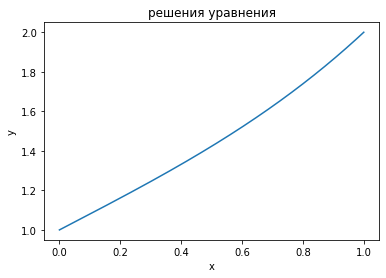

In [7]:
# решение методом стрельбы
alpha = newton_method(F, 1, 0.01)
data = rk4(f, np.array([1, alpha]), 0, 1, 0.001)
plt.plot(data[0], data[1][:, 0])
plt.title(f"решения уравнения")
plt.xlabel('x')
plt.ylabel('y')